# Modelo do desafio - Machine Leaning Plataform Engineer

### Objetivo:
Com base nos dados da tabela ​ cleaned, treine um modelo de machine learning que classifique as cervejas em seus respectivos ibus.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, SGDClassifier, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import missingno as msno
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
sns.set(style="whitegrid")


In [2]:
beer_df = pd.read_csv('data_clean.csv')

## Analisando os dados

In [3]:
beer_df.head()

,id,name,abv,ibu,target_fg,target_og,ebc,srm,ph
0,131,Motueka,6.70,67.0,1064.0,1013.0,19.0,9.50,4.4
1,155,Old World Russian Imperial Stout,9.50,80.0,1014.0,1075.0,195.0,97.50,4.5
2,259,Tropic Thunder,7.00,25.0,1020.0,1074.0,170.0,86.36,4.2
3,144,Tokyo*,16.20,85.0,1028.0,1157.0,250.0,127.00,4.4
4,20,Rabiator,10.27,26.0,1014.0,1092.0,24.0,12.00,4.4


In [4]:
beer_df.shape

(445, 9)

In [5]:
#Verificando se existe linhas duplicadas
new_beer_df = beer_df.drop_duplicates()

In [6]:
new_beer_df.shape

(237, 9)

In [7]:
new_beer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237 entries, 0 to 441
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         237 non-null    int64  
 1   name       237 non-null    object 
 2   abv        237 non-null    float64
 3   ibu        234 non-null    float64
 4   target_fg  236 non-null    float64
 5   target_og  236 non-null    float64
 6   ebc        232 non-null    float64
 7   srm        232 non-null    float64
 8   ph         235 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 18.5+ KB


In [8]:
#Excluindo linhas que possuem valor NaN
df_beer_dropna = new_beer_df.dropna()


In [9]:
df_beer_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229 entries, 0 to 441
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         229 non-null    int64  
 1   name       229 non-null    object 
 2   abv        229 non-null    float64
 3   ibu        229 non-null    float64
 4   target_fg  229 non-null    float64
 5   target_og  229 non-null    float64
 6   ebc        229 non-null    float64
 7   srm        229 non-null    float64
 8   ph         229 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 17.9+ KB


In [10]:
df_beer_dropna.shape

(229, 9)

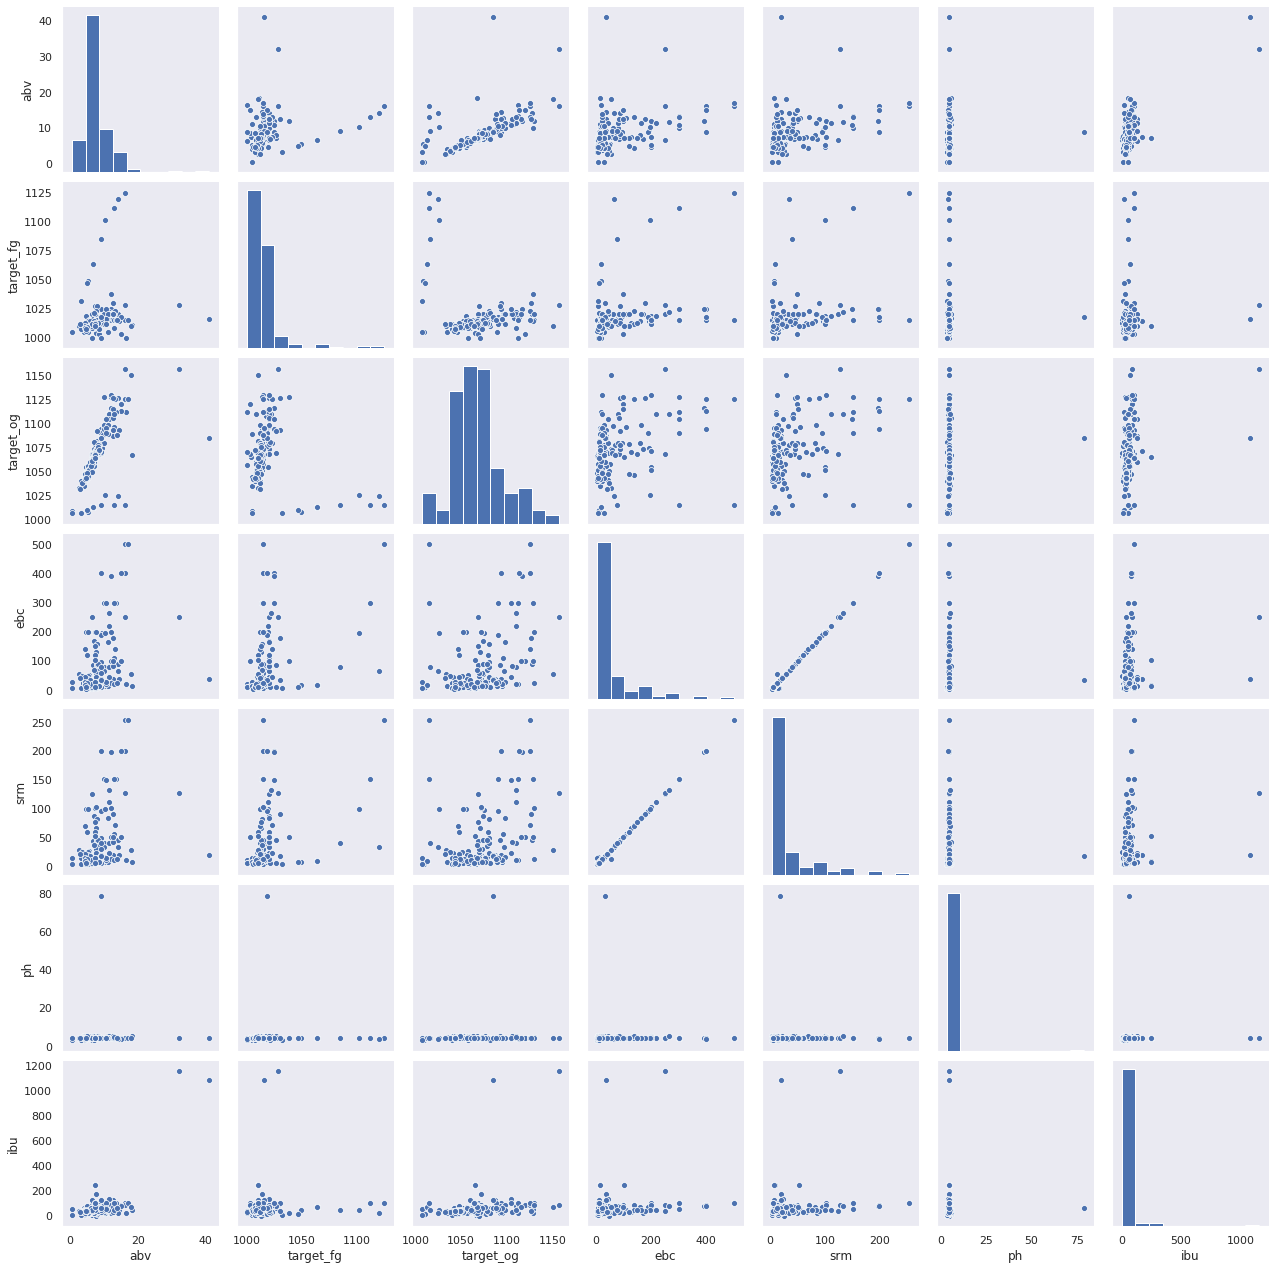

In [14]:
# criar df específico que contém apenas os campos nos quais estamos interessados
pairplot_df = df_beer_dropna.loc[:, ["abv", "target_fg", "target_og", "ebc", "srm", "ph", "ibu"]]

# Verificando se existe alguma correlação entre os dados das tabelas
sns.set(style="dark")
sns.pairplot(data=pairplot_df)
plt.show()

#### Observando a imagem a cima, pode-se verificar que os dados não possuem uma correlação bem definida. Por esse motivo, utilizou-se regressão, pois será necessário prever um valor especifico a partir dos dados inseridos. Que no caso deste valor é o Ibu.

### Separando os dados em treino e teste

Foram divididos em uma proporção de aproximadamente 90% para treino e 10% para teste devido a pequena quantidade de amostras.

In [19]:
X_train = df_beer_dropna[["abv", "target_fg", "target_og", "ebc", "srm", "ph"]][:206]
Y_train = df_beer_dropna["ibu"][:206]

X_teste = df_beer_dropna[["abv", "target_fg", "target_og", "ebc", "srm", "ph"]][206:]
Y_teste = df_beer_dropna[["ibu"]][206:]

### Realizando a normalização dos dados

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_teste)

### Foram escolhidos diversos modelos de regressão, para que fossem testados e escolhido o melhor resultado

In [25]:
LinearReg = LinearRegression()
SVM = SVR()
ada = AdaBoostRegressor()
BG = BaggingRegressor()
ET = ExtraTreesRegressor()
RF = RandomForestRegressor()
tree = DecisionTreeRegressor()

In [26]:
classifier_names = []
classifier_scores = []
classifier_mse_teste = []
classifier_score_teste = []
classifier_dict = {}

for clf in [LinearReg, SVM, ada, BG, ET, RF, tree]:
    
    model = clf.fit(X_train, Y_train)
    classifier_names.append(clf.__class__.__name__)
    
    resultado_treino = model.predict(X_train)
    mse_treino = mean_squared_error(Y_train, resultado_treino)
    score_treino = model.score(X_train,Y_train)
    classifier_scores.append(score_treino)
    
    
    y_pred = clf.predict(X_test)
    
    mse = mean_squared_error(Y_teste, y_pred)
    classifier_mse_teste.append(mse)
    
    score_teste = model.score(X_test, Y_teste)
    classifier_score_teste.append(score_teste)

In [27]:
classifier_dict['modelo'] = classifier_names
classifier_dict['Score_treino'] = classifier_scores
classifier_dict['MSE'] = classifier_mse_teste
classifier_dict['Score_teste'] = classifier_score_teste
classifier_df = pd.DataFrame(classifier_dict, index=classifier_names)
classifier_df

,modelo,Score_treino,MSE,Score_teste
LinearRegression,LinearRegression,0.614797,2738.676282,-5.157755
SVR,SVR,-0.009596,354.111320,0.203801
AdaBoostRegressor,AdaBoostRegressor,0.932869,286.776946,0.355199
BaggingRegressor,BaggingRegressor,0.915942,256.557826,0.423145
ExtraTreesRegressor,ExtraTreesRegressor,0.999995,168.706742,0.620673
RandomForestRegressor,RandomForestRegressor,0.956861,457.247339,-0.028094
DecisionTreeRegressor,DecisionTreeRegressor,0.999995,736.434783,-0.655831


### Analisando a tabela a cima podemos verificar que o modelo que obteve melhor resultado foi o ExtraTreesRegressor. Vale ressaltar que não foi utilizado uma grande quantidade de dados, sendo apenas 229 e estes divididos em treino e teste e por isso, não teve um resultado tão satisfatório.

### Além disso pode-se fazer um ajuste fino do modelo ExtraTreesRegressor e verificar o hiperparâmetros que podem trazer um resultado mais satisfatório.